In [1]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy
import numpy as np
import pandas as pd
import pykinect2
import panel as pn
import matplotlib
pn.extension()
from bokeh.plotting import figure, show, output_file
import cv2
from cv2 import aruco
import scipy.spatial.distance as cdist

Freenect module not found, KinectV1 will not work.


./../../../gempy-1.16\gempy\plotting\visualization.py:31: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')
./../../../gempy-1.16\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
./../../../gempy-1.16\gempy\data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
./../../../gempy-1.16\gempy\posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.")
./../../../gempy-1.16\gempy\posterior_analysis.py:28: Use

In [6]:
#calib = sb.CalibrationData(file = 'daniel_calibration.json')
calib = sb.CalibrationData(file = 'automatic_calibration.json')
kinect = sb.KinectV2(calib)

#sensor = sb.DummySensor(calib, depth_limits=(500,2000))
sensor = sb.KinectV2(calib)
projector = sb.Projector(calib)
module = sb.CalibModule(calib, sensor, projector)
marker = sb.ArucoMarkers(sensor)
auto = sb.AutomaticModule(calib, sensor, projector)


JSON configuration loaded.
KinectV2 initialized.
KinectV2 initialized.


Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [31]:
marker.create_CoordinateMap()

Depth_x  Depth_y  Depth_Z(mm)  Color_x  Color_y  Camera_x(m)  \
0           214       15          997      898      -65    -0.114284   
1           215       15          998      901      -65    -0.111699   
2           216       15          999      904      -65    -0.109109   
3           217       15         1000      907      -65    -0.106513   
4           218       15          997      910      -65    -0.103497   
...         ...      ...          ...      ...      ...          ...   
189042      506      423          923     1803     1188     0.678324   
189043      507      423          929     1806     1189     0.686246   
189044      508      423          914     1812     1190     0.678635   
189045      509      423          938     1814     1191     0.700031   
189046      510      423          930     1819     1192     0.697620   

        Camera_y(m)  Camera_z(m)  
0          0.517594        0.997  
1          0.518099        0.998  
2          0.518604        0.999  
3          0.519109        1.000  
4          0.517538        0.997  
...             ...          ...  
189042    -0.586702        0.923  
189043    -0.591185        0.929  
189044    -0.582305        0.914  
189045    -0.598285        0.938  
189046    -0.593874        0.930  

[189047 rows x 8 columns]

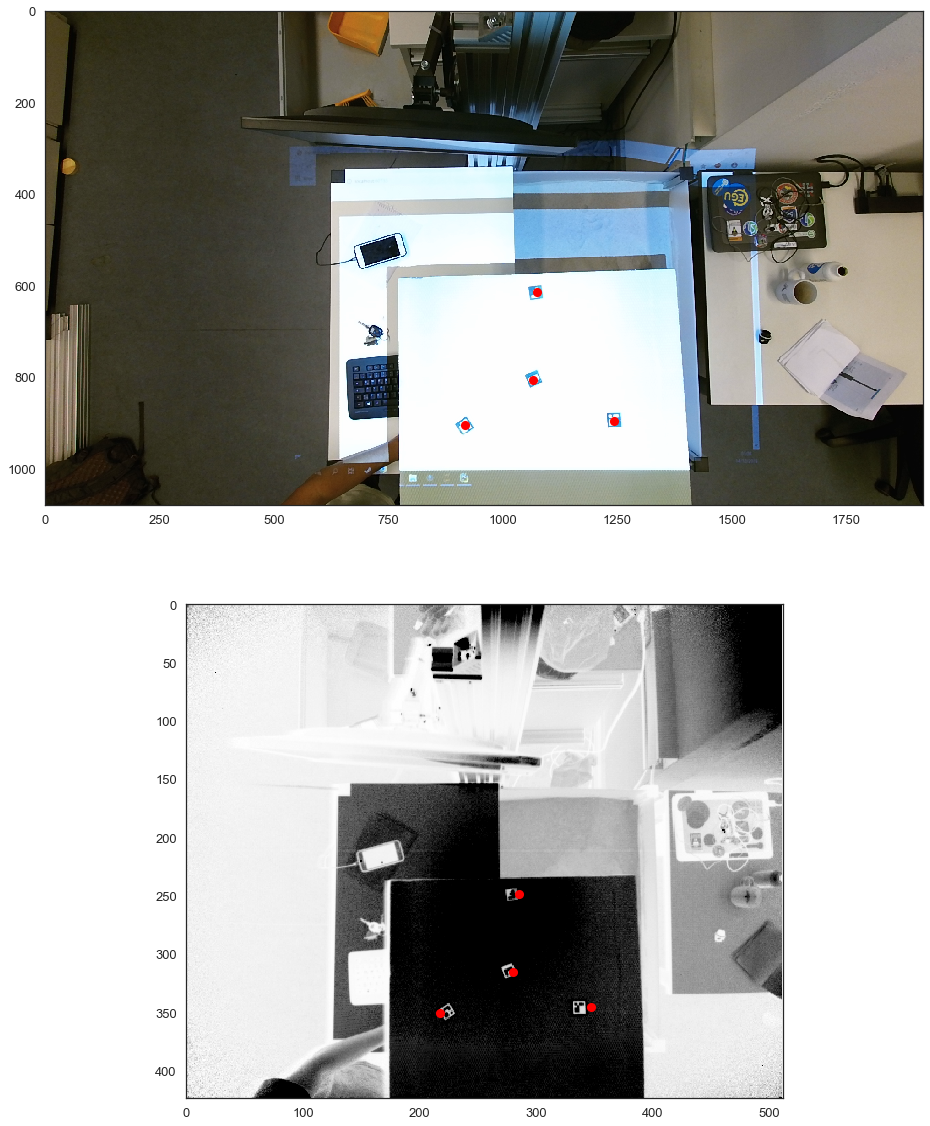

In [32]:
point_marker = marker.location_points(4)

In [33]:
point_marker

ids  Depth_x  Depth_y  Depth_Z(mm)  Color_x  Color_y  Camera_x(m)  \
157622    2    347.0    346.0       1912.0   1243.0    896.0     0.466837   
159717    5    218.0    351.0        759.0    917.0    906.0    -0.078602   
111825   15    285.0    249.0       1572.0   1075.0    615.0     0.121751   
143489    1    280.0    316.0       1258.0   1067.0    807.0     0.080062   

        Camera_y(m)  Camera_z(m)  
157622    -0.715721        1.912  
159717    -0.294308        0.759  
111825    -0.178369        1.572  
143489    -0.369682        1.258

In [ ]:
data = point_marker

In [ ]:
point_marker.ids[0]

In [ ]:
len(point_marker)

In [ ]:
for i in range (len(point_marker)):
    print(point_marker.ids[i])

In [ ]:
a = data.loc[1].x

In [ ]:
b=data.loc[data["ids"] == 5]

In [ ]:
a

In [ ]:
b.x

In [ ]:
data

In [ ]:
color_data = marker.CoordinateMap[['Color_x', 'Color_y']]
color_data

In [ ]:
value = pd.DataFrame()
for i in range(len(data)):
    x_loc = data.loc[i].x
    y_loc = data.loc[i].y
    
    distance = cdist.cdist([[x_loc, y_loc]], color_data)
    sorted_val = numpy.argsort(distance)[:][0]
    value_i = pd.DataFrame(marker.CoordinateMap.loc[sorted_val[0]]).T
    value_i.insert(0, 'ids', data.loc[i].ids)
    value = pd.concat([value, value_i], sort=False)

In [ ]:
value["Depth_x"]

In [ ]:
value_i

In [ ]:
data